In [1]:
from database.api.supabase import get_db_instance

[{'id': '03682d86-ffd5-478d-85c9-fb2ac7b247c7',
  'name': 'טונה',
  'price': 12.9,
  'unit': 'יחידה',
  'created_at': '2024-12-31T11:04:45.725449+00:00',
  'updated_at': '2024-12-31T11:04:45.725449+00:00',
  'description': 'טונה בשמן צמחי',
  'stock_quantity': 82,
  'image_url': 'https://yastatic.net/avatars/get-grocery-goods/2998515/1af19869-1ce6-49b5-a536-2431e7db718d/300x300?webp=true'},
 {'id': '2066410d-f1f7-4412-9821-073056b6bdcb',
  'name': 'סוכר',
  'price': 6.9,
  'unit': 'קילו',
  'created_at': '2024-12-31T11:04:45.725449+00:00',
  'updated_at': '2024-12-31T11:04:45.725449+00:00',
  'description': 'סוכר לבן',
  'stock_quantity': 130,
  'image_url': ''},
 {'id': '28c3689a-ed1c-4783-af7c-0a10ab84e575',
  'name': 'שמן זית',
  'price': 39.9,
  'unit': 'ליטר',
  'created_at': '2024-12-31T11:04:45.725449+00:00',
  'updated_at': '2024-12-31T11:04:45.725449+00:00',
  'description': 'שמן זית כתית מעולה',
  'stock_quantity': 65,
  'image_url': ''},
 {'id': '5d56c8e7-3fee-4066-a426-6fed
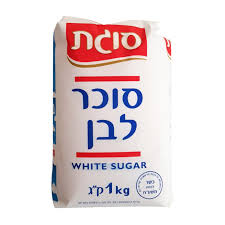
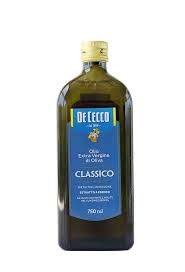
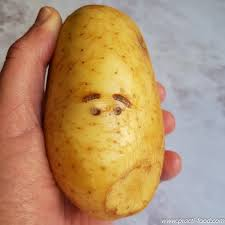
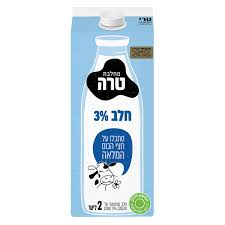
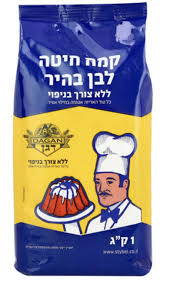
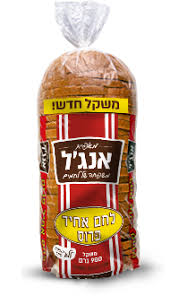
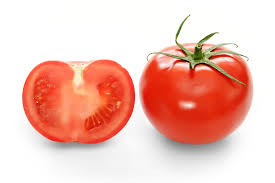
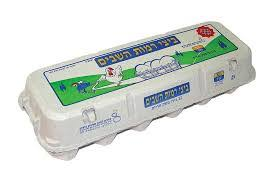
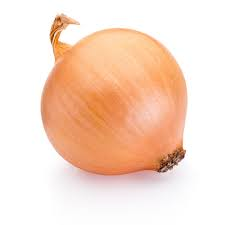
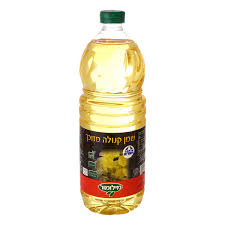
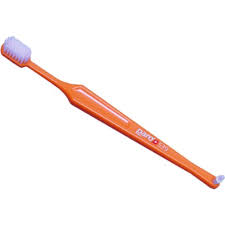
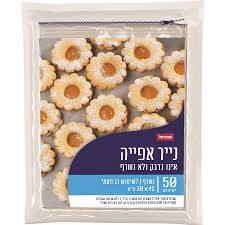
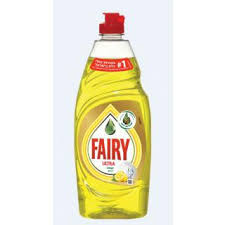
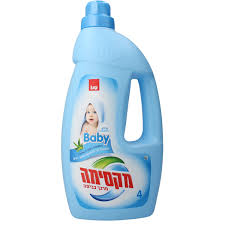
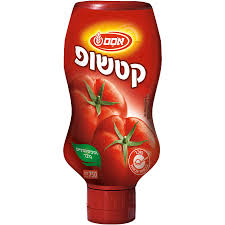
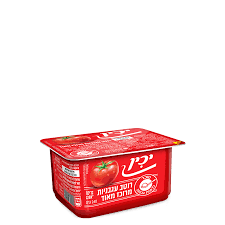
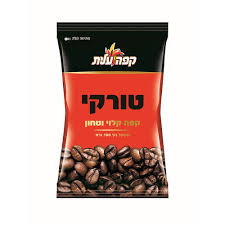
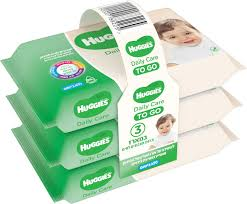
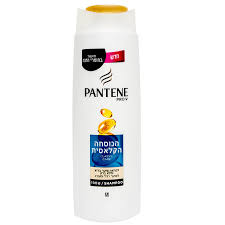
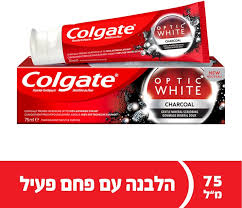
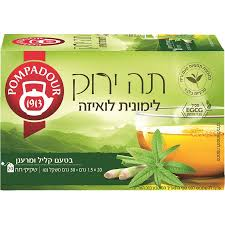
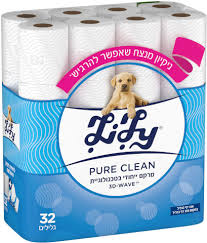
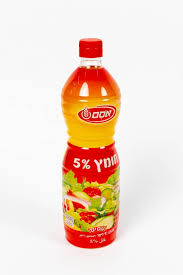
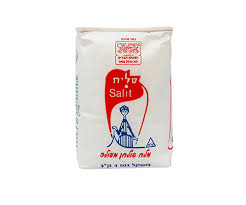
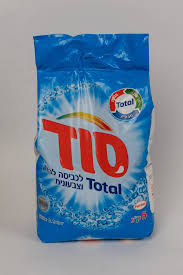

In [6]:
get_db_instance().table('products').select('*').execute().data